<a href="https://colab.research.google.com/github/HiwaTase/Machine-Learning/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Description**: The dataset, obtained from the 2010 American Community Survey (ACS), includes comprehensive demographic and socioeconomic information for 69,861 individuals. It encompasses 16 variables such as health insurance status (nohealthins), marital status (marst), race (race2), total income (inctot), usual hours worked (uhrswork), and age. Additional columns detail employment status, class of worker, education level, gender, and regional information. Some variables, like WKSWORK2 and classwkr, contain missing values. The dataset's diverse categories provide a thorough view of factors influencing health insurance coverage, making it valuable for in-depth analysis and research.

## 1:Loading the data`

In [1]:
import os
!pip install mglearn
import mglearn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/HiwaTase/Machine-Learning/main/healthINS_balanced.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,nohealthins,marst,race2,WKSWORK2,classwkr,empstat,inctot,uhrswork,age,school,cit2,educ_att,female,metro,region,vetstat
0,0,"Married, spouse present",white,NaN,NaN,Not in labor force,36300,0,71,"No, not in school",US cit by birth,HS or GED,0,Not in metro area,Middle Atlantic Division,Veteran
1,0,Widowed,white,NaN,NaN,Not in labor force,12500,0,68,"No, not in school",US cit by birth,Less than HS,1,Central city status unknown,East North Central Div.,Not a veteran
2,0,Widowed,white,40-47 weeks,Works for wages,Employed,24100,32,44,"No, not in school",US cit by birth,Less than HS,1,Not identifiable,South Atlantic Division,Not a veteran
3,0,"Married, spouse absent",latino,NaN,NaN,Not in labor force,10900,0,87,"No, not in school",US cit by birth,Less than HS,1,Central city status unknown,Middle Atlantic Division,Not a veteran
4,0,"Married, spouse present",white,1-13 weeks,Works for wages,Not in labor force,24200,16,77,"No, not in school",US cit by birth,HS or GED,0,Not in metro area,East North Central Div.,Veteran


##Step 2: Divide into a training set and a testing set

In [13]:

from sklearn.model_selection import train_test_split

X = df.drop('nohealthins', axis=1)
y = df['nohealthins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set target class distribution:")
print(y_train.value_counts())

print("\nTesting set target class distribution:")
print(y_test.value_counts())


Training set target class distribution:
nohealthins
1    29704
0    26184
Name: count, dtype: int64

Testing set target class distribution:
nohealthins
1    7427
0    6546
Name: count, dtype: int64


## step 3: Explore training set

In [17]:


train_df = pd.DataFrame(X_train)
train_df['nohealthins'] = y_train

print("Training set info:")
print(train_df.info())

print("\nTraining set description:")
print(train_df.describe())


Training set info:
<class 'pandas.core.frame.DataFrame'>
Index: 55888 entries, 66187 to 69658
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   marst        55888 non-null  object
 1   race2        55888 non-null  object
 2   WKSWORK2     35990 non-null  object
 3   classwkr     42485 non-null  object
 4   empstat      55130 non-null  object
 5   inctot       55888 non-null  int64 
 6   uhrswork     55888 non-null  int64 
 7   age          55888 non-null  int64 
 8   school       55888 non-null  object
 9   cit2         55888 non-null  object
 10  educ_att     55888 non-null  object
 11  female       55888 non-null  int64 
 12  metro        55888 non-null  object
 13  region       55888 non-null  object
 14  vetstat      54300 non-null  object
 15  nohealthins  55888 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 7.2+ MB
None

Training set description:
             inctot      uhrswork           age     

## Step 4 : Cleaning training data

In [18]:
missing_values = train_df.isnull().sum()
print(missing_values)

marst              0
race2              0
WKSWORK2       19898
classwkr       13403
empstat          758
inctot             0
uhrswork           0
age                0
school             0
cit2               0
educ_att           0
female             0
metro              0
region             0
vetstat         1588
nohealthins        0
dtype: int64


In [33]:
# Drop the specified columns
train_set1=train_df.drop(["WKSWORK2","classwkr", "empstat", "vetstat"], axis=1)

In [34]:
# Filter out negative values and top-code to 500,000
train_set1['inctot'] = train_set1['inctot'].apply(lambda x: min(max(x, 0), 500000))


train_set1['inctot'].describe()



count     55888.000000
mean      25478.106946
std       39392.499454
min           0.000000
25%        2800.000000
50%       14900.000000
75%       32000.000000
max      500000.000000
Name: inctot, dtype: float64

In [45]:
## Asuming these features have missing value:
columns_fill = ["inctot","age"]
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(X_train[columns_fill])
SimpleImputer()
X_train_new = imp_mean.transform(X_train[columns_fill])
X_test_new = imp_mean.transform(X_test[columns_fill])



## step 5 :Visualize the data in your training set

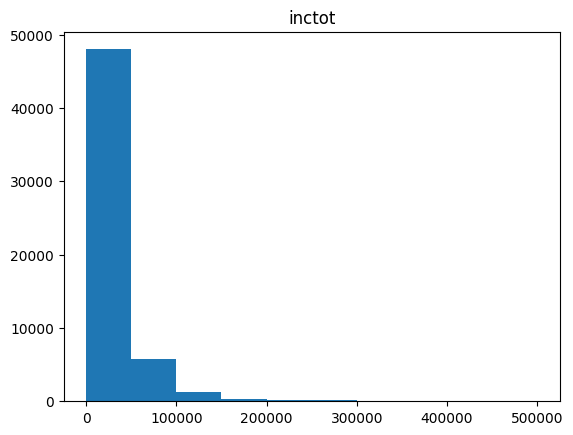

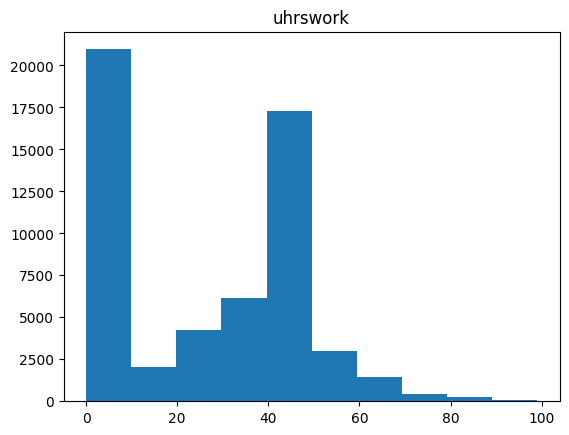

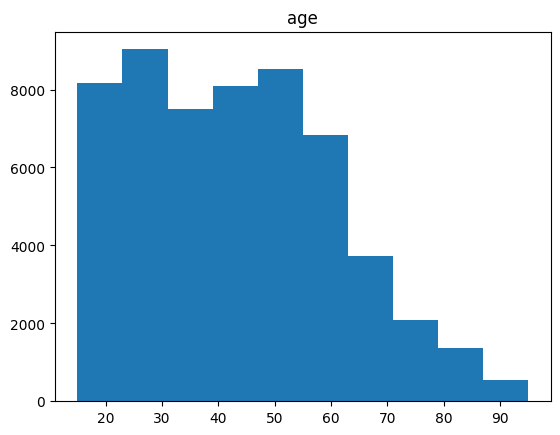

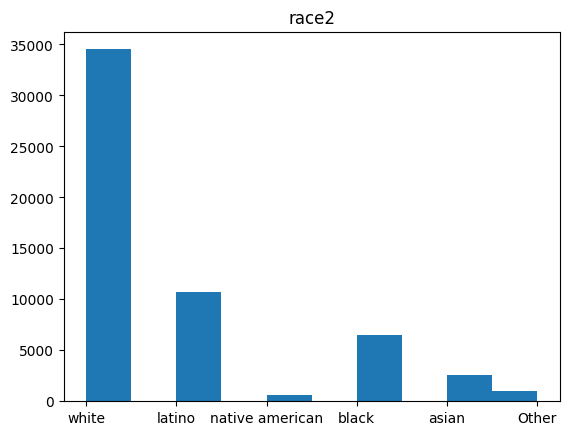

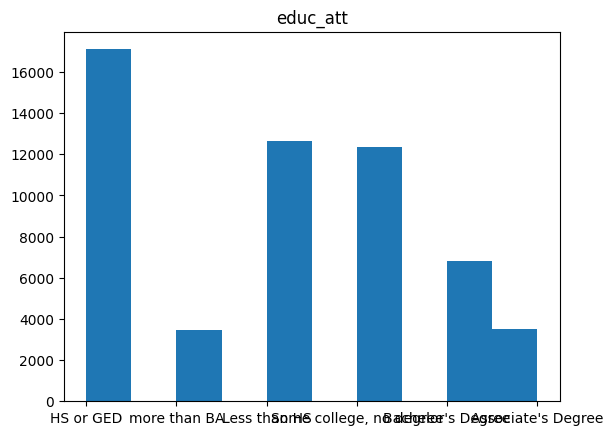

In [47]:
#train_set1.head()
#train_set1[['inctot','uhrswork','age']].hist

import matplotlib.pyplot as plt

columns_to_plot = ['inctot', 'uhrswork', 'age','race2','educ_att']

for column in columns_to_plot:
    plt.figure()
    plt.hist(train_set1[column].values, bins=10)
    plt.title(column)
    plt.show()


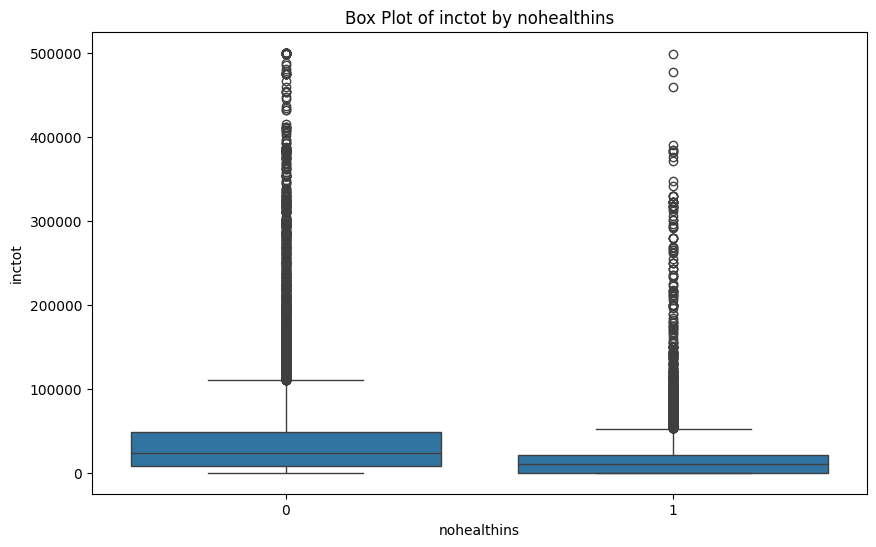

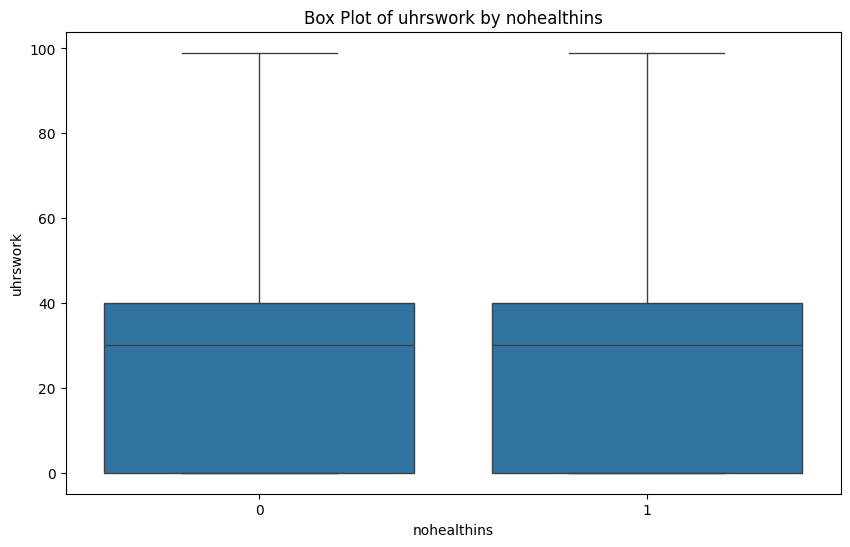

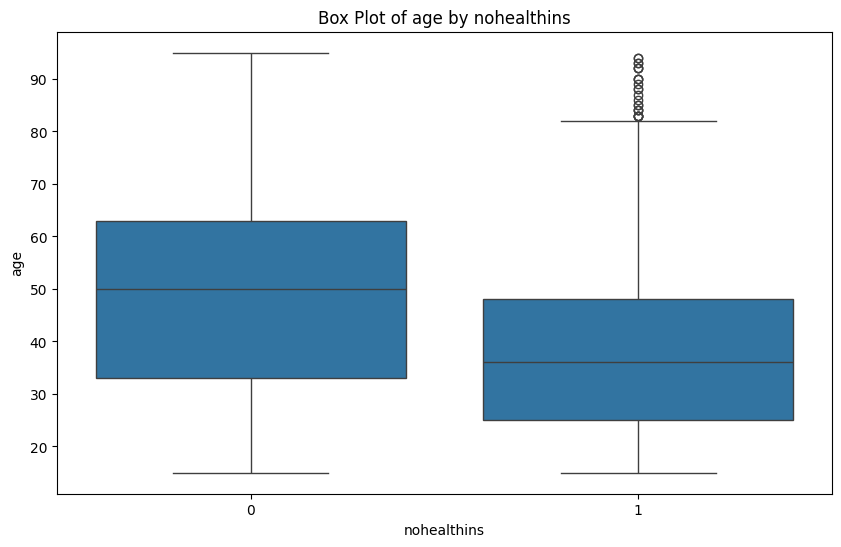

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
binary_variable = 'nohealthins'
columns_to_plot = ['inctot', 'uhrswork', 'age']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=y_train,y=column, data=train_set1)
    plt.title(f'Box Plot of {column} by {binary_variable}')
    plt.show()

array([[<Axes: xlabel='inctot', ylabel='inctot'>,
        <Axes: xlabel='age', ylabel='inctot'>,
        <Axes: xlabel='uhrswork', ylabel='inctot'>],
       [<Axes: xlabel='inctot', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='uhrswork', ylabel='age'>],
       [<Axes: xlabel='inctot', ylabel='uhrswork'>,
        <Axes: xlabel='age', ylabel='uhrswork'>,
        <Axes: xlabel='uhrswork', ylabel='uhrswork'>]], dtype=object)

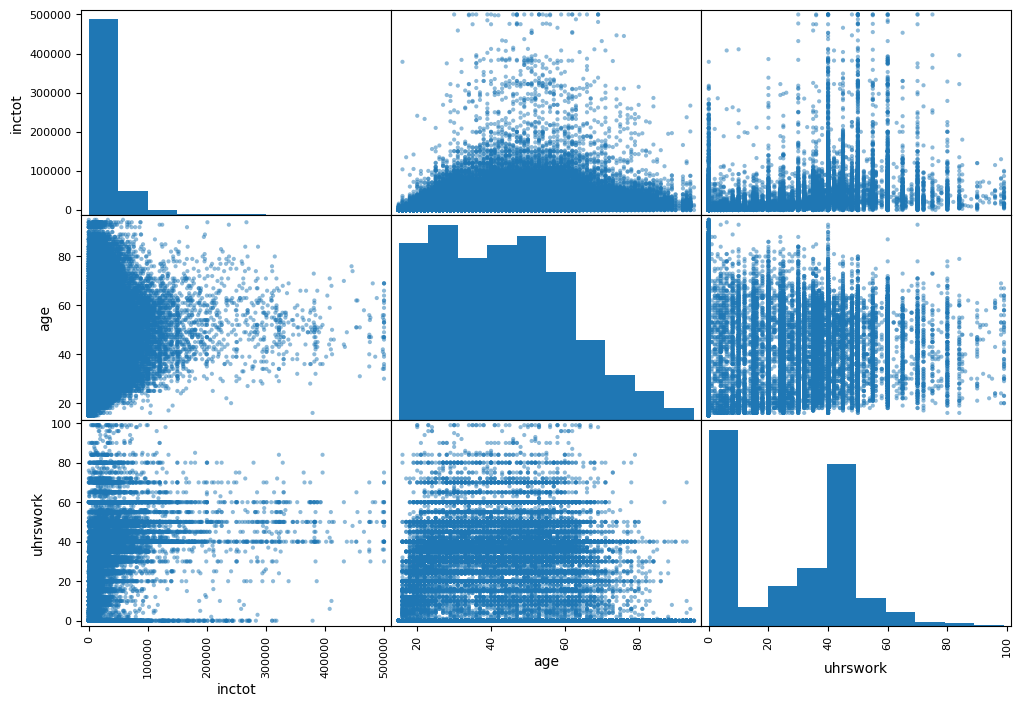

In [48]:

attributes = ["inctot", "age","uhrswork"]
scatter_matrix(train_set1[attributes], figsize=(12, 8))

##Step 6:Apply transformations

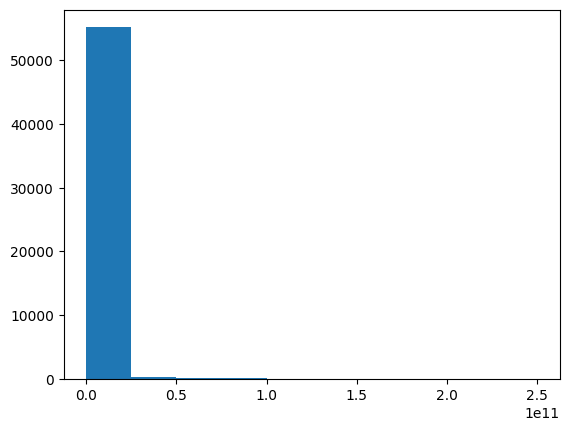

In [ ]:
plt.hist(train_set1['inctot'].values.reshape(-1, 1)**2, bins=10)
plt.show()

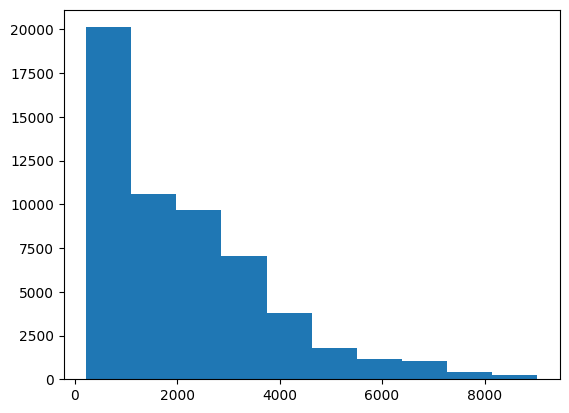

In [ ]:
plt.hist(train_set1['age'].values.reshape(-1, 1)**2, bins=10)
plt.show()

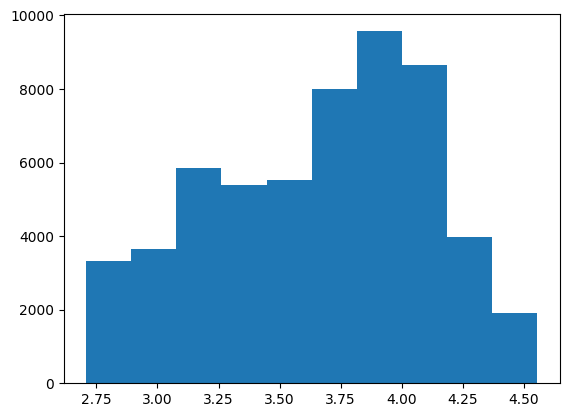

In [ ]:

plt.hist(np.log(train_set1['age'].values.reshape(-1, 1)), bins=10)
plt.show()

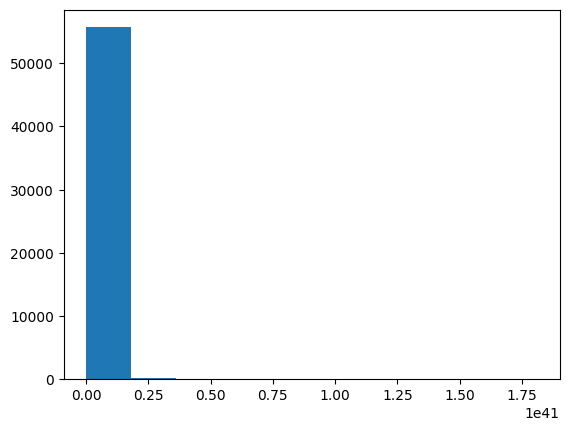

In [ ]:

plt.hist(np.exp(train_set1['age'].values.reshape(-1, 1)), bins=10)
plt.show()

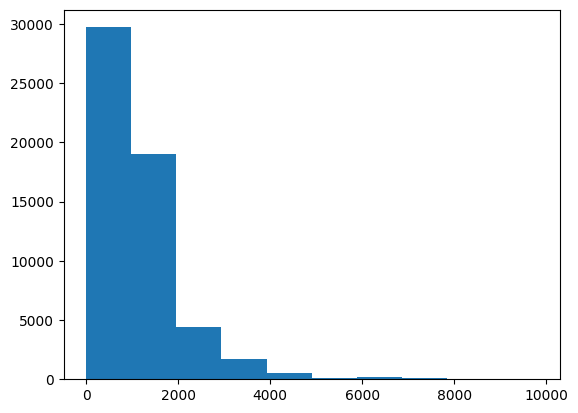

In [ ]:

plt.hist(train_set1['uhrswork'].values.reshape(-1, 1)**2, bins=10)
plt.show()

array([[<Axes: xlabel='inctot', ylabel='inctot'>,
        <Axes: xlabel='age', ylabel='inctot'>,
        <Axes: xlabel='uhrswork', ylabel='inctot'>],
       [<Axes: xlabel='inctot', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='uhrswork', ylabel='age'>],
       [<Axes: xlabel='inctot', ylabel='uhrswork'>,
        <Axes: xlabel='age', ylabel='uhrswork'>,
        <Axes: xlabel='uhrswork', ylabel='uhrswork'>]], dtype=object)

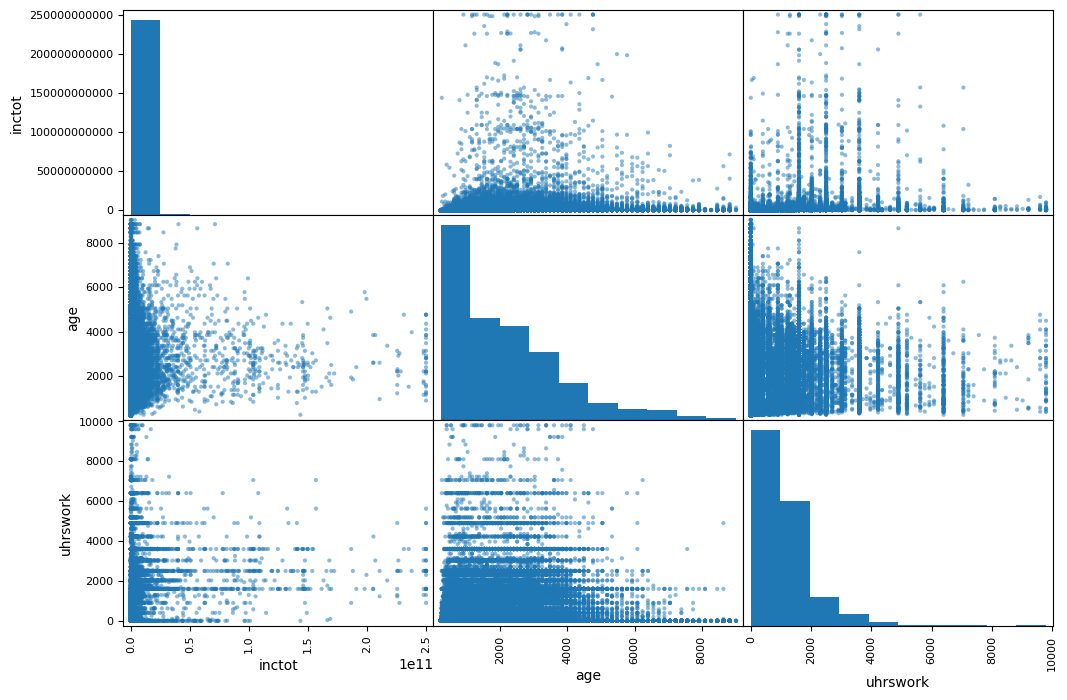

In [ ]:
attributes = ["inctot", "age","uhrswork"]
scatter_matrix(train_set1[attributes]**2, figsize=(12, 8))

array([[<Axes: xlabel='inctot', ylabel='inctot'>,
        <Axes: xlabel='age', ylabel='inctot'>,
        <Axes: xlabel='uhrswork', ylabel='inctot'>],
       [<Axes: xlabel='inctot', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='uhrswork', ylabel='age'>],
       [<Axes: xlabel='inctot', ylabel='uhrswork'>,
        <Axes: xlabel='age', ylabel='uhrswork'>,
        <Axes: xlabel='uhrswork', ylabel='uhrswork'>]], dtype=object)

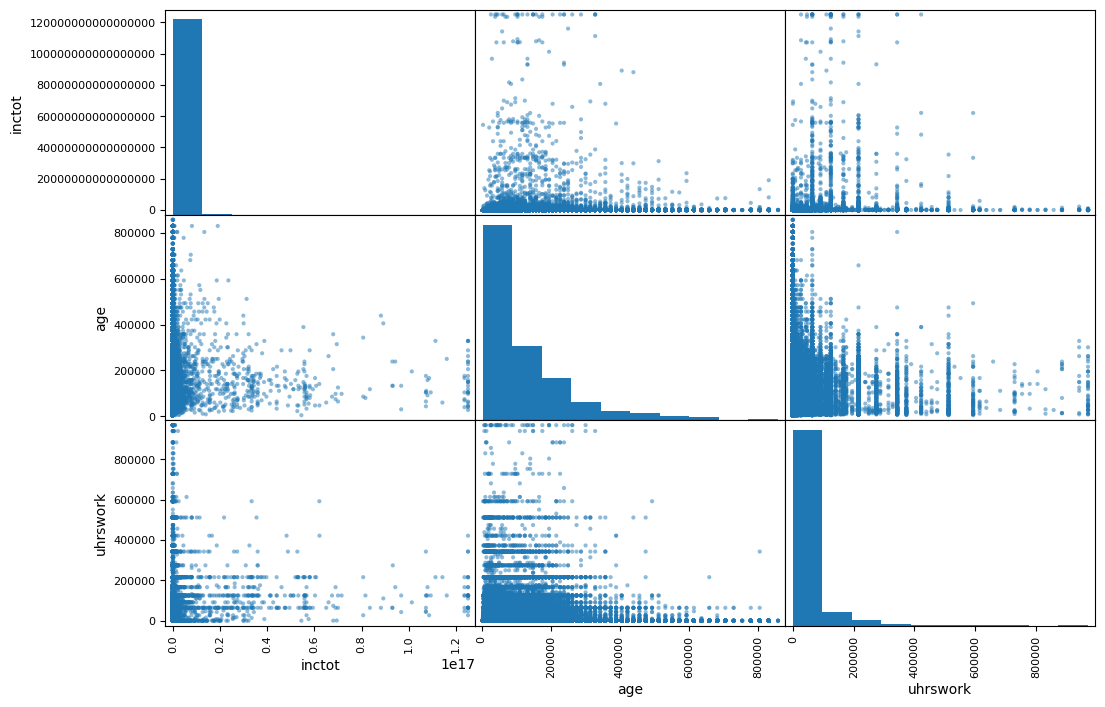

In [ ]:

scatter_matrix(train_set1[attributes]**3, figsize=(12, 8))